In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from scipy import signal
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import IPython.display as ipd
import librosa
import librosa.display
%matplotlib inline

In [33]:
fs, audio    = wavfile.read('AD.wav') #   Blowing towards the mic., noise

ipd.display(ipd.Audio(audio, rate=fs))

In [34]:
def plot_spectrogram(audio, fs, tstart, tstop):
    f, t, Zxx = signal.stft(audio, fs, window ='hann', nperseg=480)

    f_ind = (f<=10000)
    t_ind = ((t >=tstart) & (t <=tstop))
    z_ind = np.ix_(f_ind, t_ind)

    Zabs_cropped = np.abs(Zxx[z_ind])
    Zabs_cropped = Zabs_cropped / np.max(Zabs_cropped)

    fig, ax = plt.subplots(figsize=(9, 6))

    # create the spectrogram
    im = ax.pcolormesh(t[t_ind], f[f_ind], 20*np.log10(Zabs_cropped), shading='gouraud', vmin = -50, vmax = 0, cmap = 'jet')
    ax.set_ylim([0,10000])

    ax.set_title('STFT Sqrt. Magnitude')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    plt.show()

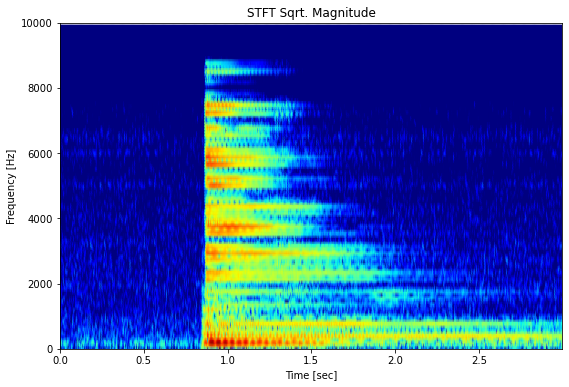

In [35]:
plot_spectrogram(audio, fs, 0, 3)

In [38]:
y, sr = librosa.load('AD.wav')#, duration=5)
D = librosa.stft(y)
H, P = librosa.decompose.hpss(D, margin=3.0)
R = D - (H+P)
y_harm = librosa.istft(H)
y_perc = librosa.istft(P)
y_resi = librosa.istft(R)

In [40]:
ipd.display(ipd.Audio(y_harm, rate=sr))

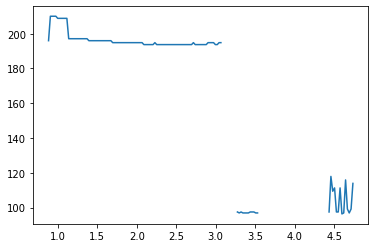

In [42]:
y, sr = librosa.load('AD.wav')
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)

#f0[np.isnan(f0)] = 0
#f_tone = librosa.hz_to_note(f0)
plt.plot(times, f0)

In [43]:
f0[f0 == np.NaN] = 0 

C:\Users\Havard\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Havard\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Havard\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


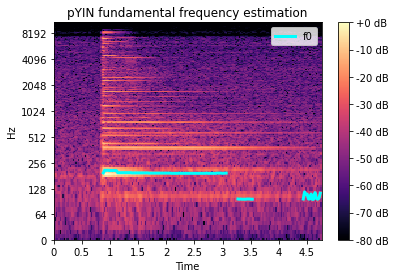

In [44]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

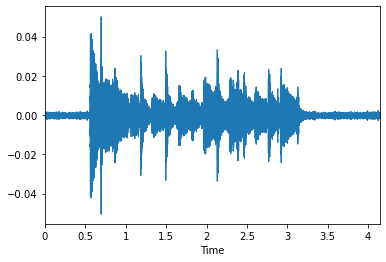

In [31]:
librosa.display.waveplot(y,sr)